# **New York City Yellow Taxi Data** by Pranav Jadhav



## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('/content/drive/MyDrive/Upgrad Assignment/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [101]:
# Unziping the files

import zipfile
import os

zip_file_path = "/content/drive/MyDrive/Upgrad Assignment/Datasets and Dictionary-NYC.zip"

# Directory to extract
extract_path = "/content/drive/MyDrive/Upgrad Assignment/unzipped_files"

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Unzip the files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pyarrow

# Select the folder having data files
os.chdir('/content/unzipped_files/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_month = pd.read_parquet(file_path)
        df_month['tpep_pickup_date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['tpep_pickup_hour'] = df_month['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df_month['tpep_pickup_date'].unique():
            df_date = df_month[df_month['tpep_pickup_date'] == date]
            for hour in df_date['tpep_pickup_hour'].unique():

            # Iterate through each hour of the selected date
                df_hour = df_date[df_date['tpep_pickup_hour'] == hour]

                # Sample 5% of the hourly data randomly
                sample = df_hour.sample(frac=0.05, random_state=27)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_csv('/content/drive/MyDrive/Upgrad Assignment/Combined_files.csv')

NameError: name 'df' is not defined

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [6]:
# Load the new data file
NYC_records = pd.read_csv("/content/drive/MyDrive/Upgrad Assignment/Combined_files.csv", parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime','tpep_pickup_date'])


In [7]:
# df.head()
NYC_records.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0          33         2  2023-01-01 00:18:08   2023-01-01 00:32:43   
1        2282         2  2023-01-01 00:19:18   2023-01-01 00:26:11   
2        3269         1  2023-01-01 00:22:41   2023-01-01 00:48:36   
3        2025         1  2023-01-01 00:28:54   2023-01-01 00:32:40   
4        3545         2  2023-01-01 00:53:22   2023-01-01 01:02:18   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           2.17         1.0                  N   
1              6.0           1.91         1.0                  N   
2              2.0           2.10         1.0                  N   
3              1.0           1.00         1.0                  N   
4              1.0           1.66         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           161           107             2         14.2    1.0      0.5   
1           148           137             1         10.0    1.0      0.5   
2           140           164             1         22.6    2.5      0.5   
3           237           141             1          7.2    3.5      0.5   
4            13           209             1         10.7    1.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        0.00           0.0                    1.0         19.20   
1        3.00           0.0                    1.0         18.00   
2        6.65           0.0                    1.0         33.25   
3        2.40           0.0                    1.0         14.60   
4        3.14           0.0                    1.0         18.84   

   congestion_surcharge  airport_fee tpep_pickup_date  tpep_pickup_hour  \
0                   2.5          0.0       2023-01-01                 0   
1                   2.5          0.0       2023-01-01                 0   
2                   2.5          0.0       2023-01-01                 0   
3                   2.5          0.0       2023-01-01                 0   
4                   2.5          0.0       2023-01-01                 0   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [8]:
# df.info()
NYC_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   VendorID               int64         
 2   tpep_pickup_datetime   datetime64[ns]
 3   tpep_dropoff_datetime  datetime64[ns]
 4   passenger_count        float64       
 5   trip_distance          float64       
 6   RatecodeID             float64       
 7   store_and_fwd_flag     object        
 8   PULocationID           int64         
 9   DOLocationID           int64         
 10  payment_type           int64         
 11  fare_amount            float64       
 12  extra                  float64       
 13  mta_tax                float64       
 14  tip_amount             float64       
 15  tolls_amount           float64       
 16  improvement_surcharge  float64       
 17  total_amount           float64       
 18  congestion_surcharge  

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [9]:
# Fix the index and drop any columns that are not needed
NYC_records.reset_index(drop=True, inplace=True)

# Seperating the Date and Hour from `tpep_dropoff_datetime` column
NYC_records['tpep_dropoff_date']= NYC_records['tpep_dropoff_datetime'].dt.date
NYC_records['tpep_dropoff_hour']= NYC_records['tpep_dropoff_datetime'].dt.hour
NYC_records['tpep_dropoff_date']=pd.to_datetime(NYC_records['tpep_dropoff_date'])


In [10]:
NYC_records.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0          33         2  2023-01-01 00:18:08   2023-01-01 00:32:43   
1        2282         2  2023-01-01 00:19:18   2023-01-01 00:26:11   
2        3269         1  2023-01-01 00:22:41   2023-01-01 00:48:36   
3        2025         1  2023-01-01 00:28:54   2023-01-01 00:32:40   
4        3545         2  2023-01-01 00:53:22   2023-01-01 01:02:18   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           2.17         1.0                  N   
1              6.0           1.91         1.0                  N   
2              2.0           2.10         1.0                  N   
3              1.0           1.00         1.0                  N   
4              1.0           1.66         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           161           107             2         14.2    1.0      0.5   
1           148           137             1         10.0    1.0      0.5   
2           140           164             1         22.6    2.5      0.5   
3           237           141             1          7.2    3.5      0.5   
4            13           209             1         10.7    1.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        0.00           0.0                    1.0         19.20   
1        3.00           0.0                    1.0         18.00   
2        6.65           0.0                    1.0         33.25   
3        2.40           0.0                    1.0         14.60   
4        3.14           0.0                    1.0         18.84   

   congestion_surcharge  airport_fee tpep_pickup_date  tpep_pickup_hour  \
0                   2.5          0.0       2023-01-01                 0   
1                   2.5          0.0       2023-01-01                 0   
2                   2.5          0.0       2023-01-01                 0   
3                   2.5          0.0       2023-01-01                 0   
4                   2.5          0.0       2023-01-01                 0   

   Airport_fee tpep_dropoff_date  tpep_dropoff_hour  
0          NaN        2023-01-01                  0  
1          NaN        2023-01-01                  0  
2          NaN        2023-01-01                  0  
3          NaN        2023-01-01                  0  
4          NaN        2023-01-01                  1

In [11]:
NYC_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   VendorID               int64         
 2   tpep_pickup_datetime   datetime64[ns]
 3   tpep_dropoff_datetime  datetime64[ns]
 4   passenger_count        float64       
 5   trip_distance          float64       
 6   RatecodeID             float64       
 7   store_and_fwd_flag     object        
 8   PULocationID           int64         
 9   DOLocationID           int64         
 10  payment_type           int64         
 11  fare_amount            float64       
 12  extra                  float64       
 13  mta_tax                float64       
 14  tip_amount             float64       
 15  tolls_amount           float64       
 16  improvement_surcharge  float64       
 17  total_amount           float64       
 18  congestion_surcharge  

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [12]:
# Checking shape of the dataframe when Airport_fee is not null and airport_fee is null
# Checking wether shape of the dataframe when ariport is not null and Airport_fee is null
nyc_copy = NYC_records.copy()
def create_missing_value_columns(df, col1 ="Airport_fee", col2 ="airport_fee"):
    """
    Creates three new columns in a DataFrame based on missing values in two specified columns.

    Args:
        df (pd.DataFrame): The input DataFrame.
        col1 (str): The name of the first column.
        col2 (str): The name of the second column.

    Returns:
        pd.DataFrame: The DataFrame with three new columns:
            - f'{col1}_missing_and_{col2}_present': 1 if col1 is missing and col2 is present, 0 otherwise.
            - f'{col2}_missing_and_{col1}_present': 1 if col2 is missing and col1 is present, 0 otherwise.
            - f'{col1}_equal_{col2}': 1 if col1 and col2 have the same value (including both NaN), 0 otherwise.
    """

    df[f'{col1}_missing_and_{col2}_present'] = ((df[col1].isnull()) & (df[col2].notnull())).astype(int)
    df[f'{col2}_missing_and_{col1}_present'] = ((df[col2].isnull()) & (df[col1].notnull())).astype(int)
    df[f'{col1}_equal_{col2}'] = (df[col1] == df[col2]).astype(int)

    # Handle NaN equality explicitly
    df.loc[df[col1].isnull() & df[col2].isnull(), f'{col1}_equal_{col2}'] = 1

    return df
nyc_copy = create_missing_value_columns(nyc_copy)
nyc_copy.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0          33         2  2023-01-01 00:18:08   2023-01-01 00:32:43   
1        2282         2  2023-01-01 00:19:18   2023-01-01 00:26:11   
2        3269         1  2023-01-01 00:22:41   2023-01-01 00:48:36   
3        2025         1  2023-01-01 00:28:54   2023-01-01 00:32:40   
4        3545         2  2023-01-01 00:53:22   2023-01-01 01:02:18   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           2.17         1.0                  N   
1              6.0           1.91         1.0                  N   
2              2.0           2.10         1.0                  N   
3              1.0           1.00         1.0                  N   
4              1.0           1.66         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           161           107             2         14.2    1.0      0.5   
1           148           137             1         10.0    1.0      0.5   
2           140           164             1         22.6    2.5      0.5   
3           237           141             1          7.2    3.5      0.5   
4            13           209             1         10.7    1.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        0.00           0.0                    1.0         19.20   
1        3.00           0.0                    1.0         18.00   
2        6.65           0.0                    1.0         33.25   
3        2.40           0.0                    1.0         14.60   
4        3.14           0.0                    1.0         18.84   

   congestion_surcharge  airport_fee tpep_pickup_date  tpep_pickup_hour  \
0                   2.5          0.0       2023-01-01                 0   
1                   2.5          0.0       2023-01-01                 0   
2                   2.5          0.0       2023-01-01                 0   
3                   2.5          0.0       2023-01-01                 0   
4                   2.5          0.0       2023-01-01                 0   

   Airport_fee tpep_dropoff_date  tpep_dropoff_hour  \
0          NaN        2023-01-01                  0   
1          NaN        2023-01-01                  0   
2          NaN        2023-01-01                  0   
3          NaN        2023-01-01                  0   
4          NaN        2023-01-01                  1   

   Airport_fee_missing_and_airport_fee_present  \
0                                            1   
1                                            1   
2                                            1   
3                                            1   
4                                            1   

   airport_fee_missing_and_Airport_fee_present  Airport_fee_equal_airport_fee  
0                                            0                              0  
1                                            0                              0  
2                                            0                              0  
3                                            0                              0  
4                                            0                              0

In [13]:
nyc_copy.iloc[:,-3:].sum()

Airport_fee_missing_and_airport_fee_present     148695
airport_fee_missing_and_Airport_fee_present    1684712
Airport_fee_equal_airport_fee                    62993
dtype: int64

In [14]:
nyc_copy[(nyc_copy["Airport_fee"].isna())&(nyc_copy["airport_fee"].isna())].shape[0]

62993

In [15]:
nyc_copy.shape[0]

1896400

In [16]:
# Checking Null values in both the columns
NYC_records[['Airport_fee', 'airport_fee']].isnull().sum()

Airport_fee     211688
airport_fee    1747705
dtype: int64

In [17]:
# Combine the two airport fee columns
NYC_records["Airport_fee_combined"] = np.where(NYC_records["Airport_fee"].isnull() & NYC_records["airport_fee"].notnull(),NYC_records["airport_fee"],
                                               np.where(NYC_records["airport_fee"].isnull() & NYC_records["Airport_fee"].notnull(),NYC_records["Airport_fee"],
                                                        np.where(NYC_records["Airport_fee"]==NYC_records["airport_fee"],NYC_records["Airport_fee"],np.nan)))

In [18]:
NYC_records.drop(['Airport_fee', 'airport_fee'], axis=1, inplace=True)
NYC_records.rename(columns={'Airport_fee_combined': 'Airport_fee'}, inplace=True)

In [19]:
NYC_records.Airport_fee.isnull().sum()

np.int64(62993)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [20]:
# check where values of fare amount are negative
NYC_records[NYC_records['fare_amount'] < 0].shape[0] # filtering the fare_amount column which are less than zero


0

Did you notice something different in the `RatecodeID` column for above records?

In [21]:
# Analyse RatecodeID for the negative fare amounts
NYC_records[NYC_records['fare_amount'] <= 0].RatecodeID.unique() # checking for the unique values in the RatecodeID column for values which equals zero / less than 0

array([ 5.,  2.,  1.,  3., nan, 99.,  4.])

In Ratecode column we have value 99. which shouldn't be there as we have descrete values ranging from 1 ot 6

In [22]:
# lets consider as it had fare amounts and other amounts as negative this is possibly null values so we will consider it as null and replace it with nan
NYC_records["RatecodeID"] = NYC_records["RatecodeID"].replace(99, np.nan)

In [23]:
# Find which columns have negative values

for i in (NYC_records.select_dtypes(["float64", "int64"])).columns: # looping through Numerical columns in dataframe
    if (NYC_records[i] < 0).any(): # finding if there's any records with negative value
        print(i) # printing the columns

extra
mta_tax
improvement_surcharge
total_amount
congestion_surcharge
Airport_fee


In [24]:
# fix these negative values
NYC_records[["extra", "mta_tax", "improvement_surcharge", "congestion_surcharge", "Airport_fee", "total_amount"]] = \
NYC_records[["extra", "mta_tax", "improvement_surcharge", "congestion_surcharge", "Airport_fee", "total_amount"]].abs()
# replaced the -ve values with their absolute value

In [25]:
# rechecking the columns if they still remains with negative values
for i in (NYC_records.select_dtypes(["float64", "int64"])).columns:
    if (NYC_records[i] < 0).any():
        print(i)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [26]:
# Find the proportion of missing values in each column
100*(NYC_records.isnull().mean())


Unnamed: 0               0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.321715
trip_distance            0.000000
RatecodeID               3.883252
store_and_fwd_flag       3.321715
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.321715
tpep_pickup_date         0.000000
tpep_pickup_hour         0.000000
tpep_dropoff_date        0.000000
tpep_dropoff_hour        0.000000
Airport_fee              3.321715
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [27]:
# Display the rows with null values
NYC_records[NYC_records['passenger_count'].isnull()].head()



Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
17     2995227         2  2023-01-01 00:49:00   2023-01-01 01:08:00   
27     2995321         2  2023-01-01 00:59:00   2023-01-01 01:18:00   
53     2995055         2  2023-01-01 00:59:28   2023-01-01 01:14:31   
55     2995105         2  2023-01-01 00:46:00   2023-01-01 01:06:00   
59     2995374         2  2023-01-01 00:47:00   2023-01-01 00:55:00   

    passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
17              NaN           8.09         NaN                NaN   
27              NaN           4.17         NaN                NaN   
53              NaN           4.11         NaN                NaN   
55              NaN           5.81         NaN                NaN   
59              NaN           1.92         NaN                NaN   

    PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
17           236            13             0        36.01    0.0      0.5   
27            36            79             0        24.68    0.0      0.5   
53            52            49             0        19.70    0.0      0.5   
55           256           141             0        30.88    0.0      0.5   
59           236           142             0        13.29    0.0      0.5   

    tip_amount  tolls_amount  improvement_surcharge  total_amount  \
17        8.00           0.0                    1.0         48.01   
27        0.00           0.0                    0.3         27.98   
53        3.18           0.0                    1.0         24.38   
55        3.49           0.0                    1.0         38.37   
59        2.59           0.0                    1.0         19.88   

    congestion_surcharge tpep_pickup_date  tpep_pickup_hour tpep_dropoff_date  \
17                   NaN       2023-01-01                 0        2023-01-01   
27                   NaN       2023-01-01                 0        2023-01-01   
53                   NaN       2023-01-01                 0        2023-01-01   
55                   NaN       2023-01-01                 0        2023-01-01   
59                   NaN       2023-01-01                 0        2023-01-01   

    tpep_dropoff_hour  Airport_fee  
17                  1          NaN  
27                  1          NaN  
53                  1          NaN  
55                  1          NaN  
59                  0          NaN

In [28]:
  # Impute NaN values in 'passenger_count'
  NYC_records['passenger_count'].value_counts()

passenger_count
1.0    1376451
2.0     278988
3.0      69616
4.0      39200
0.0      29051
5.0      24295
6.0      15787
8.0         13
7.0          4
9.0          2
Name: count, dtype: int64

In [29]:
  NYC_records['passenger_count'].describe()

count    1.833407e+06
mean     1.372539e+00
std      8.951686e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

In [30]:
NYC_records["passenger_count"].fillna(1, inplace=True) # imputing  mode of the column i.e 1 in the place of null values

Did you find zeroes in passenger_count? Handle these.

In [31]:
# replacing the 0 in passenger_count column with 1
NYC_records['passenger_count'].replace(0,1,inplace=True)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [32]:
# Fix missing values in 'RatecodeID'
NYC_records['RatecodeID'].isnull().sum() # finding the count of null values in the ratecodeId column


np.int64(73642)

In [33]:
NYC_records["RatecodeID"].value_counts() # getting count of each value in the ratecodeID

RatecodeID
1.0    1730357
2.0      71965
5.0      10475
3.0       6200
4.0       3758
6.0          3
Name: count, dtype: int64

In [34]:
NYC_records.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'tpep_pickup_date', 'tpep_pickup_hour',
       'tpep_dropoff_date', 'tpep_dropoff_hour', 'Airport_fee'],
      dtype='object')

	The final rate code in effect at the end of the trip.
1 = Standard rate
2 = JFK
3 = Newark
4 = Nassau or Westchester
5 = Negotiated fare
6 = Group ride

In [35]:
NYC_records[NYC_records['RatecodeID'].isnull()].head() # displaying the first 5 rows of the filtered column

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
17     2995227         2  2023-01-01 00:49:00   2023-01-01 01:08:00   
27     2995321         2  2023-01-01 00:59:00   2023-01-01 01:18:00   
53     2995055         2  2023-01-01 00:59:28   2023-01-01 01:14:31   
55     2995105         2  2023-01-01 00:46:00   2023-01-01 01:06:00   
59     2995374         2  2023-01-01 00:47:00   2023-01-01 00:55:00   

    passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
17              1.0           8.09         NaN                NaN   
27              1.0           4.17         NaN                NaN   
53              1.0           4.11         NaN                NaN   
55              1.0           5.81         NaN                NaN   
59              1.0           1.92         NaN                NaN   

    PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
17           236            13             0        36.01    0.0      0.5   
27            36            79             0        24.68    0.0      0.5   
53            52            49             0        19.70    0.0      0.5   
55           256           141             0        30.88    0.0      0.5   
59           236           142             0        13.29    0.0      0.5   

    tip_amount  tolls_amount  improvement_surcharge  total_amount  \
17        8.00           0.0                    1.0         48.01   
27        0.00           0.0                    0.3         27.98   
53        3.18           0.0                    1.0         24.38   
55        3.49           0.0                    1.0         38.37   
59        2.59           0.0                    1.0         19.88   

    congestion_surcharge tpep_pickup_date  tpep_pickup_hour tpep_dropoff_date  \
17                   NaN       2023-01-01                 0        2023-01-01   
27                   NaN       2023-01-01                 0        2023-01-01   
53                   NaN       2023-01-01                 0        2023-01-01   
55                   NaN       2023-01-01                 0        2023-01-01   
59                   NaN       2023-01-01                 0        2023-01-01   

    tpep_dropoff_hour  Airport_fee  
17                  1          NaN  
27                  1          NaN  
53                  1          NaN  
55                  1          NaN  
59                  0          NaN

In [36]:
NYC_records.groupby("RatecodeID")["mta_tax"].mean() #trying to find the relation with the ratecodeid and mta-tax

RatecodeID
1.0    0.499638
2.0    0.499517
3.0    0.000000
4.0    0.419918
5.0    0.066062
6.0    0.500000
Name: mta_tax, dtype: float64

In [37]:
NYC_records.RatecodeID.mode() # finding the mode of the column

0    1.0
Name: RatecodeID, dtype: float64

In [38]:
# Imputing the missing values in the RatecodeID with the mode of the column
NYC_records.RatecodeID.fillna(NYC_records.RatecodeID.mode()[0], inplace=True)

In [39]:
NYC_records.RatecodeID.isnull().sum() # rechecking if any null value is there or not

np.int64(0)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [40]:
NYC_records.congestion_surcharge.isnull().sum() # finding the count of null values in the column

np.int64(62993)

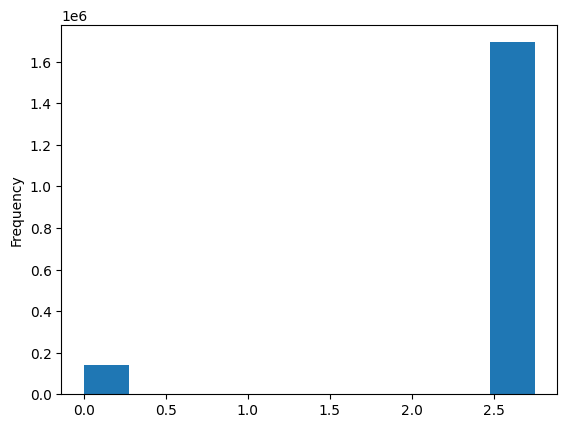

In [41]:
NYC_records.congestion_surcharge.plot.hist() # plotting the histogram of the column
plt.show();


In [42]:
NYC_records.congestion_surcharge.value_counts() # getting the value counts in the column

congestion_surcharge
2.50    1693222
0.00     140183
2.75          1
0.75          1
Name: count, dtype: int64

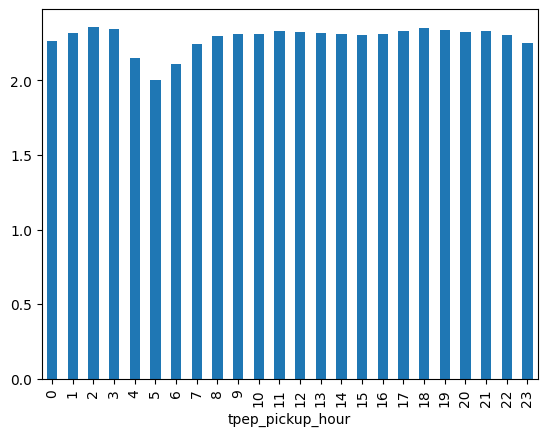

In [43]:
NYC_records.groupby("tpep_pickup_hour")["congestion_surcharge"].mean().plot.bar() # ploting bar graph to identify the relation between t
plt.show();

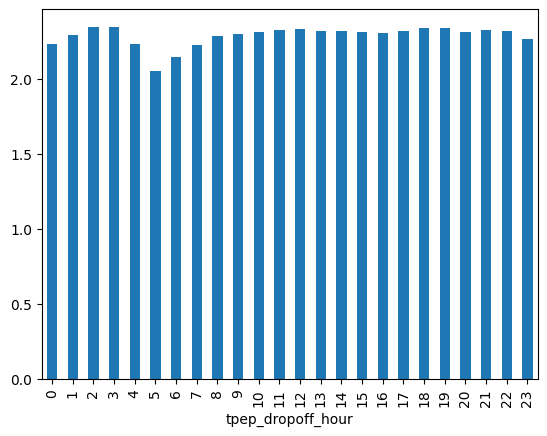

In [44]:
NYC_records.groupby("tpep_dropoff_hour")["congestion_surcharge"].mean().plot.bar() # ploting to identify the meaning between the tpep_dropoff_hour and congestion_surcharge
plt.show();

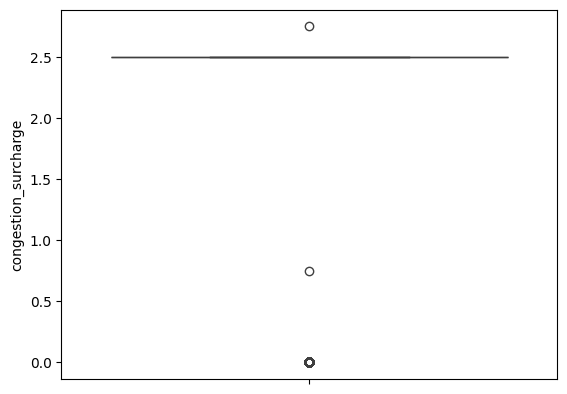

In [45]:
sns.boxplot(NYC_records.congestion_surcharge) # boxplot of congestion_surcharge
plt.show();

In [46]:
NYC_records["time_taken_in_min"] = NYC_records["tpep_dropoff_datetime"] - NYC_records["tpep_pickup_datetime"] # creating a new column time_taken_in_min
NYC_records["time_taken_in_min"] = abs(NYC_records["time_taken_in_min"].dt.total_seconds() /60)

In [47]:
# trip_distance and diff
NYC_records.trip_distance.describe()

count    1.896400e+06
mean     3.917455e+00
std      1.552147e+02
min      0.000000e+00
25%      1.050000e+00
50%      1.800000e+00
75%      3.400000e+00
max      1.186298e+05
Name: trip_distance, dtype: float64

In [48]:
#
NYC_records[["trip_distance","congestion_surcharge"]].head()

trip_distance  congestion_surcharge
0           2.17                   2.5
1           1.91                   2.5
2           2.10                   2.5
3           1.00                   2.5
4           1.66                   2.5

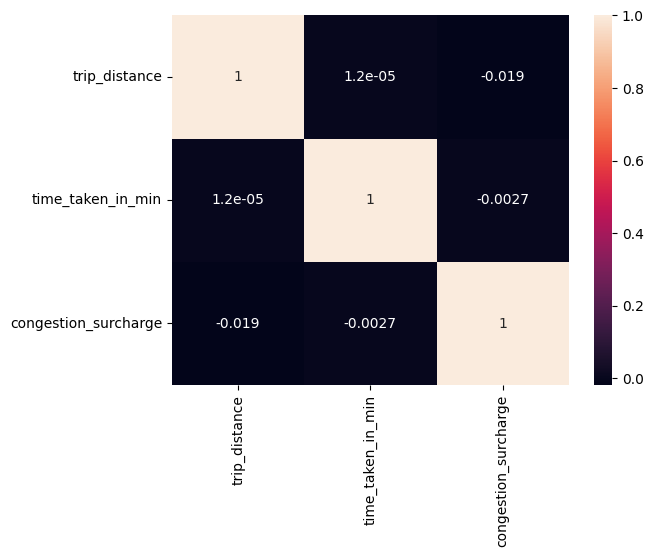

In [49]:
df_corr = NYC_records[NYC_records['congestion_surcharge'].notnull()][['trip_distance', 'time_taken_in_min', 'congestion_surcharge']]
sns.heatmap(df_corr.corr(), annot = True)
plt.show();

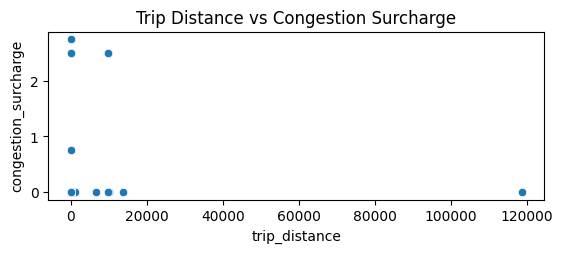

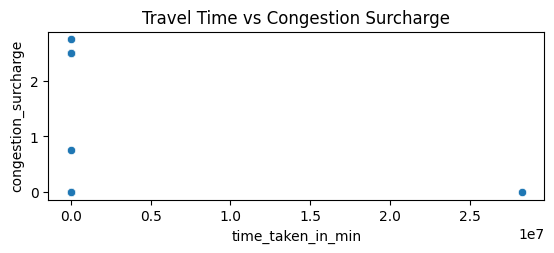

In [50]:

# Plot only non-null rows
df_non_null = NYC_records[NYC_records['congestion_surcharge'].notnull()]
plt.subplot(2,1,1)
sns.scatterplot(data=df_non_null, x='trip_distance', y='congestion_surcharge')
plt.title("Trip Distance vs Congestion Surcharge")
plt.show()
plt.subplot(2,1,2)
sns.scatterplot(data=df_non_null, x='time_taken_in_min', y='congestion_surcharge')
plt.title("Travel Time vs Congestion Surcharge")
plt.show()

In [51]:
# handle null values in congestion_surcharge
NYC_records.congestion_surcharge.fillna(2.5, inplace=True)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [52]:
NYC_records.isnull().mean()*100

Unnamed: 0               0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       3.321715
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
tpep_pickup_date         0.000000
tpep_pickup_hour         0.000000
tpep_dropoff_date        0.000000
tpep_dropoff_hour        0.000000
Airport_fee              3.321715
time_taken_in_min        0.000000
dtype: float64

In [53]:
NYC_records.store_and_fwd_flag.value_counts() # looking for the values count in the column


store_and_fwd_flag
N    1822200
Y      11207
Name: count, dtype: int64

In [54]:

NYC_records.Airport_fee.value_counts() #looking for the value count in the columns


Airport_fee
0.00    1671943
1.75     121484
1.25      39980
Name: count, dtype: int64

In [55]:
# Handle any remaining missing values
NYC_records.Airport_fee.fillna(0, inplace = True) # filling the null value in the Airport_fee column with 0
NYC_records.store_and_fwd_flag.fillna('N', inplace=True) # filling the null value in the store_and_fwd_flag with mode of the column

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [56]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

NYC_records.describe()

Unnamed: 0      VendorID           tpep_pickup_datetime  \
count  1.896400e+06  1.896400e+06                        1896400   
mean   1.604618e+06  1.736204e+00  2023-07-02 19:59:49.696940032   
min    0.000000e+00  1.000000e+00            2022-12-31 23:58:59   
25%    7.975082e+05  1.000000e+00            2023-04-02 16:08:57   
50%    1.594720e+06  2.000000e+00            2023-06-27 15:45:45   
75%    2.391659e+06  2.000000e+00            2023-10-06 19:41:01   
max    3.522272e+06  6.000000e+00            2023-12-31 23:59:59   
std    9.373786e+05  4.452495e-01                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        1896400     1.896400e+06   1.896400e+06   
mean   2023-07-02 20:02:30.103635968     1.375483e+00   3.917455e+00   
min              1970-01-20 10:16:32     1.000000e+00   0.000000e+00   
25%       2023-04-02 16:28:39.500000     1.000000e+00   1.050000e+00   
50%       2023-06-27 16:06:24.500000     1.000000e+00   1.800000e+00   
75%    2023-10-06 19:57:57.249999872     1.000000e+00   3.400000e+00   
max              2024-01-01 21:34:04     9.000000e+00   1.186298e+05   
std                              NaN     8.675123e-01   1.552147e+02   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.072534e+00  1.652637e+02  1.639854e+02  1.164170e+00  1.988078e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  1.320000e+02  1.130000e+02  1.000000e+00  9.300000e+00   
50%    1.000000e+00  1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01   
75%    1.000000e+00  2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01   
max    6.000000e+00  2.650000e+02  2.650000e+02  5.000000e+00  1.726600e+03   
std    3.898934e-01  6.398608e+01  6.984867e+01  5.053244e-01  1.836059e+01   

              extra       mta_tax    tip_amount  tolls_amount  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.582753e+00  4.952859e-01  3.552784e+00  6.010950e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  5.000000e-01  1.000000e+00  0.000000e+00   
50%    1.000000e+00  5.000000e-01  2.850000e+00  0.000000e+00   
75%    2.500000e+00  5.000000e-01  4.420000e+00  0.000000e+00   
max    1.650000e+01  4.000000e+00  7.118800e+02  1.110000e+02   
std    1.828684e+00  4.846756e-02  4.098966e+00  2.198181e+00   

       improvement_surcharge  total_amount  congestion_surcharge  \
count           1.896400e+06  1.896400e+06          1.896400e+06   
mean            9.991723e-01  2.895783e+01          2.315198e+00   
min             0.000000e+00  0.000000e+00          0.000000e+00   
25%             1.000000e+00  1.596000e+01          2.500000e+00   
50%             1.000000e+00  2.100000e+01          2.500000e+00   
75%             1.000000e+00  3.100000e+01          2.500000e+00   
max             1.000000e+00  1.736290e+03          2.750000e+00   
std             2.665817e-02  2.293996e+01          6.541052e-01   

                    tpep_pickup_date  tpep_pickup_hour  \
count                        1896400      1.896400e+06   
mean   2023-07-02 05:13:54.963088896      1.426504e+01   
min              2022-12-31 00:00:00      0.000000e+00   
25%              2023-04-02 00:00:00      1.100000e+01   
50%              2023-06-27 00:00:00      1.500000e+01   
75%              2023-10-06 00:00:00      1.900000e+01   
max              2023-12-31 00:00:00      2.300000e+01   
std                              NaN      5.807381e+00   

                   tpep_dropoff_date  tpep_dropoff_hour   Airport_fee  \
count                        1896400       1.896400e+06  1.896400e+06   
mean   2023-07-02 05:13:43.618646016       1.431196e+01  1.384581e-01   
min              1970-01-20 00:00:00       0.000000e+00  0.000000e+00   
25%              2023

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [57]:
# remove passenger_count > 6
NYC_records.drop(NYC_records[NYC_records["passenger_count"] >6].index, inplace=True)

In [58]:
# checking the outliers in the payment type
NYC_records.payment_type.value_counts()


payment_type
1    1494734
2     316335
0      62993
4      13349
3       8969
5          1
Name: count, dtype: int64

In [59]:
# We  dont have 0 in our column discription and it is the categorical data we will replace the 0 with 1 as it is the mode of the column
NYC_records.payment_type.replace(0,1,inplace=True)

In [60]:
# trip distance
plt.figure(figsize = (5,15))
sns.boxplot(NYC_records.trip_distance)
plt.show();

In [61]:
# trip distance and fare
plt.figure(figsize = (5,5))
sns.scatterplot(data=NYC_records, x='trip_distance', y='fare_amount')
plt.show();

In [62]:
# let see the percentile in fare amount where trip distance less than 1
NYC_records[NYC_records["trip_distance"]<=1].fare_amount.quantile([0.25, 0.5, 0.75, 0.85, 0.95, 0.99, 1])

0.25      5.80
0.50      7.20
0.75      9.30
0.85     10.70
0.95     18.18
0.99     70.00
1.00    660.00
Name: fare_amount, dtype: float64

In [63]:
# proportion of the records where the fare amount for the 0 trip_distance is more than 300
NYC_records[(NYC_records["trip_distance"]<=1) & (NYC_records["fare_amount"]>300)].shape[0]/NYC_records.shape[0]

2.1620128022797106e-05

In [64]:
# its less than 1 percent so lets drop those values
NYC_records.drop(NYC_records[(NYC_records["trip_distance"]<=1) & (NYC_records["fare_amount"]>300)].index, inplace=True)

In [65]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
NYC_records[(NYC_records["trip_distance"]==0) & (NYC_records["fare_amount"]==0) & (NYC_records["PULocationID"]!=NYC_records["DOLocationID"])].shape[0]

69

In [66]:
# We will drop the records where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
NYC_records.drop(NYC_records[(NYC_records["trip_distance"]==0) & (NYC_records["fare_amount"]==0) & (NYC_records["PULocationID"]!=NYC_records["DOLocationID"])].index, inplace=True)

In [67]:
# trip distance and fare
plt.figure(figsize = (5,5))
sns.scatterplot(data=NYC_records, x='trip_distance', y='fare_amount')
plt.show();

In [68]:
# Continue with outlier handling
# trip_distance
# removing the outliers in the trip distance which are more than 250 miles
NYC_records[NYC_records["trip_distance"]>250].shape[0]


45

In [69]:
# there are 45 such values so we will remove them
NYC_records.drop(NYC_records[NYC_records["trip_distance"]>250].index, inplace=True)

In [70]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [71]:
NYC_records.columns.tolist()

['Unnamed: 0',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'tpep_pickup_date',
 'tpep_pickup_hour',
 'tpep_dropoff_date',
 'tpep_dropoff_hour',
 'Airport_fee',
 'time_taken_in_min']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical(nominal)
* `tpep_pickup_datetime`: Categorical(nominal)
* `tpep_dropoff_datetime`: Categorical(nominal)
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical(nominal)
* `PULocationID`: Categorical(nominal)
* `DOLocationID`: Categorical(nominal)
* `payment_type`: Categorical(nominal)
* `pickup_hour`: Categorical(ordinal)
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

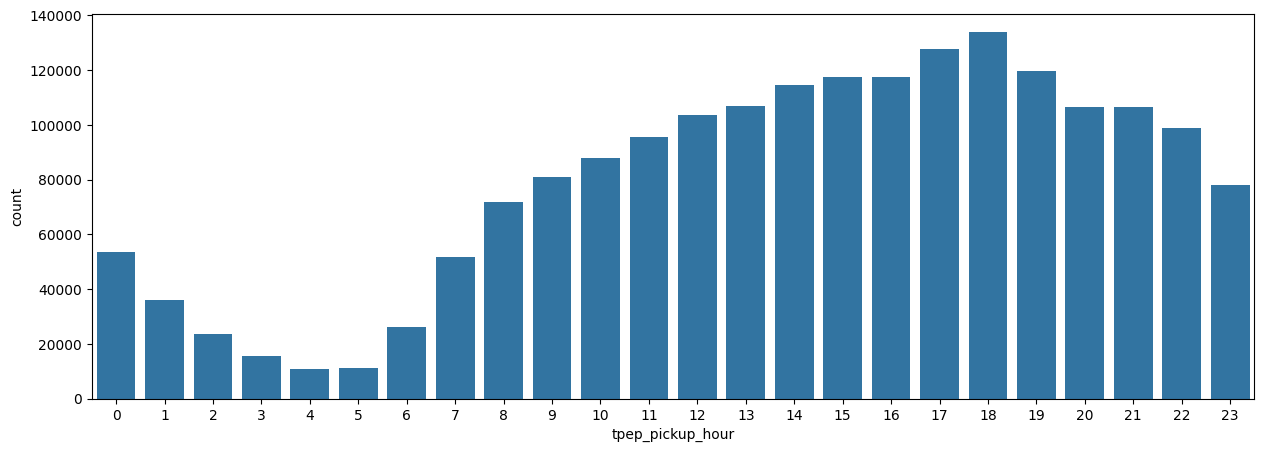

In [72]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=(15,5))
sns.countplot(x=NYC_records.tpep_pickup_hour)
plt.show();


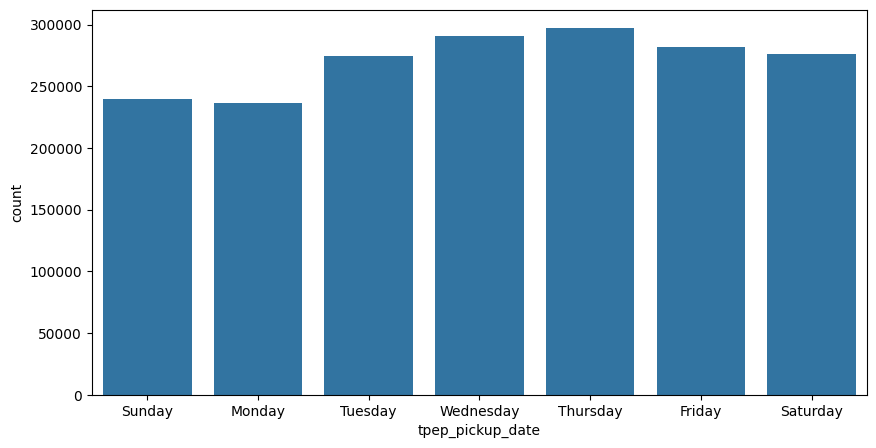

In [73]:
# Find and show the daily trends in taxi pickups (days of the week)
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(10,5))
sns.countplot(x=NYC_records.tpep_pickup_date.dt.day_name(), order=day_order)
plt.show();


In [74]:
# Show the monthly trends in pickups
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize= (10,5))
sns.countplot(x=NYC_records.tpep_pickup_date.dt.month_name(), order = month_order)
plt.xticks(rotation = 45)
plt.show();


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [75]:
# Analyse the above parameters
print(NYC_records.shape[0])

for columns in ["fare_amount", "tip_amount", "total_amount", "trip_distance"]:
    print(f"Columns: {columns}")
    print(NYC_records[NYC_records[i] !=0].shape[0])

1896226
Columns: fare_amount
161450
Columns: tip_amount
161450
Columns: total_amount
161450
Columns: trip_distance
161450


In [76]:
for columns in ["fare_amount", "tip_amount", "total_amount", "trip_distance"]:
    print(f"Columns: {columns}")
    print(f"Min: {NYC_records[columns].min()}")
    print(f"Max: {NYC_records[columns].max()}")

Columns: fare_amount
Min: 0.0
Max: 750.0
Columns: tip_amount
Min: 0.0
Max: 711.88
Columns: total_amount
Min: 0.0
Max: 901.2
Columns: trip_distance
Min: 0.0
Max: 132.1


In [77]:
# creating the df where we only consider non zero values in each fare_amount, tip_amount, total_amount and trip_distance column
NYC_non_zero = NYC_records[
    (NYC_records["fare_amount"]>0) &
 (NYC_records["tip_amount"]>0) &
  (NYC_records["total_amount"]>0) &
   (NYC_records["trip_distance"]>0)
   ]
NYC_non_zero.shape[0]

1452802

In [78]:
for columns in ["fare_amount", "tip_amount", "total_amount", "trip_distance"]:
    print(f"Columns: {columns}")
    print(f"Min: {NYC_non_zero[columns].min()}")
    print(f"Max: {NYC_non_zero[columns].max()}")

Columns: fare_amount
Min: 0.01
Max: 750.0
Columns: tip_amount
Min: 0.01
Max: 711.88
Columns: total_amount
Min: 3.98
Max: 901.2
Columns: trip_distance
Min: 0.01
Max: 130.3


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Yes it should be beneficial to create a copy of DataFrame leaving out the zero values from these dataframe as in analyzing the financial that zero wont matter a lot


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [79]:
# Create a df with non zero entries for the selected parameters.
NYC_non_zero = NYC_records[
    (NYC_records["fare_amount"]>0) &
 (NYC_records["tip_amount"]>0) &
  (NYC_records["total_amount"]>0) &
   (NYC_records["trip_distance"]>0)
   ]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

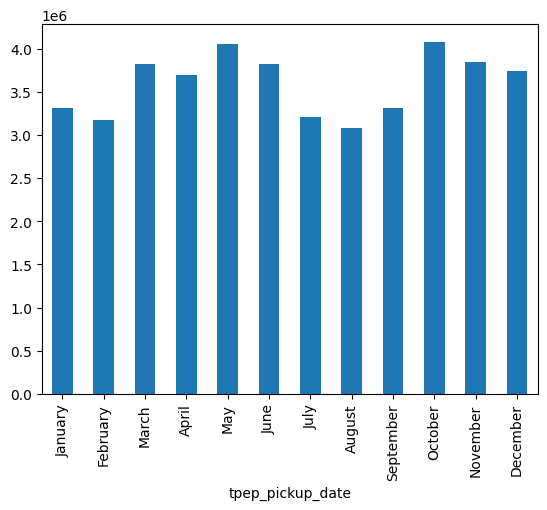

In [80]:
# Group data by month and analyse monthly revenue
(NYC_non_zero.groupby(NYC_non_zero.tpep_pickup_date.dt.month_name())["total_amount"].sum()).reindex(month_order).plot.bar()
plt.show();

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

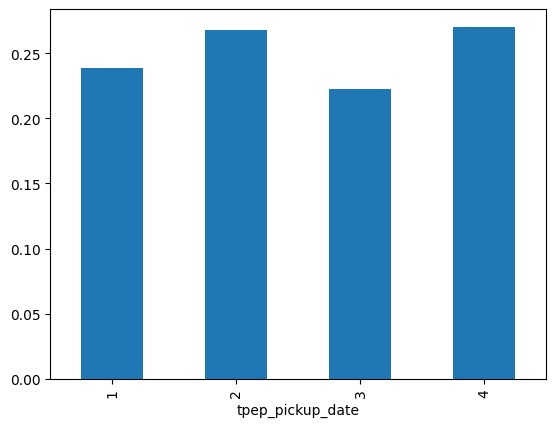

In [81]:
# Calculate proportion of each quarter

(NYC_non_zero.groupby(NYC_non_zero.tpep_pickup_date.dt.quarter)["total_amount"].sum()/NYC_non_zero.total_amount.sum()).plot.bar()
plt.show();

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

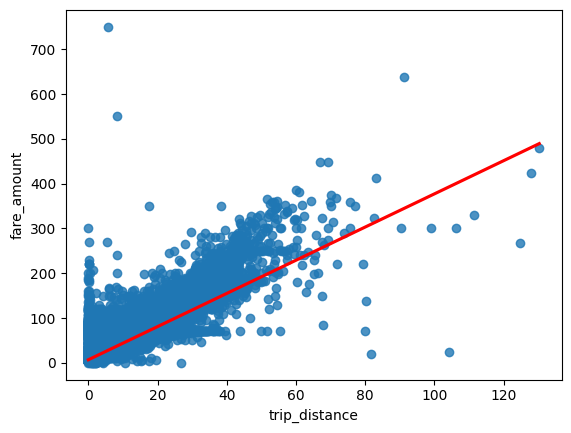

In [82]:
# Show how trip fare is affected by distance

sns.regplot(x = NYC_non_zero[NYC_non_zero['trip_distance'] !=0]['trip_distance' ], y = NYC_non_zero[NYC_non_zero['trip_distance'] !=0]['fare_amount'], line_kws={'color': 'red'})
plt.show();


In [83]:
#Show how trip fare is affected by distance correlation
sns.heatmap(NYC_non_zero[NYC_non_zero['trip_distance'] !=0][['trip_distance', 'fare_amount']].corr(), annot = True)
plt.show();

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [84]:
# Show relationship between fare and trip duration
sns.heatmap(NYC_non_zero[['fare_amount', 'time_taken_in_min']].corr(), annot = True)
plt.show();

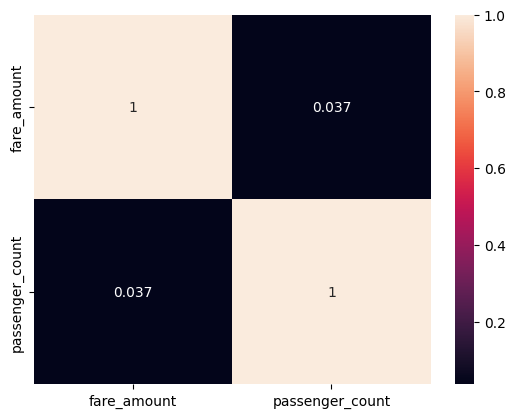

In [85]:
# Show relationship between fare and number of passengers
sns.heatmap(NYC_non_zero[['fare_amount', 'passenger_count']].corr(), annot = True)
plt.show();


In [86]:
# Show relationship between tip and trip distance

sns.heatmap(NYC_non_zero[['tip_amount', 'trip_distance']].corr(), annot = True)
plt.show();

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

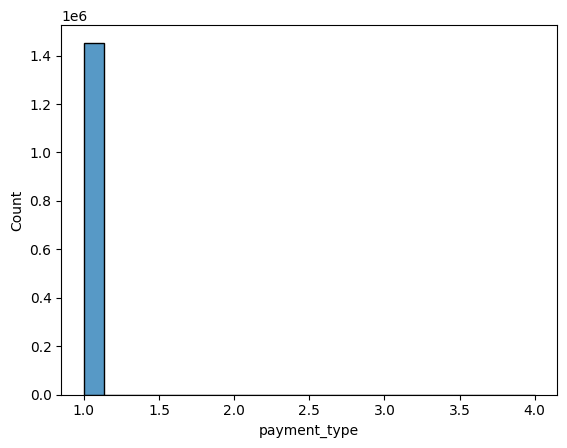

In [87]:
# Analyse the distribution of different payment types (payment_type).
sns.histplot(data=NYC_non_zero, x='payment_type')
plt.show();


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [88]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [89]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'/content/drive/MyDrive/Upgrad Assignment/unzipped_files/Datasets and Dictionary/taxi_zones/taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

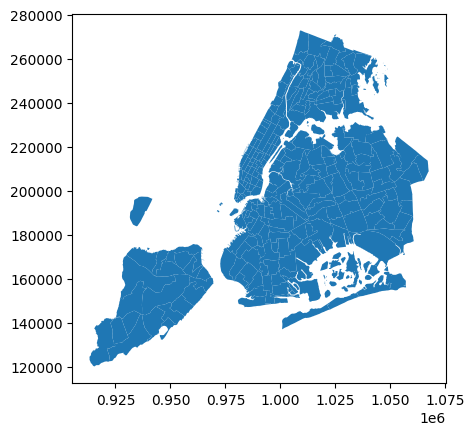

In [90]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [91]:
# Merge zones and trip records using locationID and PULocationID

NYC_complete = pd.merge(NYC_non_zero, zones, left_on = 'PULocationID', right_on = 'LocationID')
NYC_complete.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        2282         2  2023-01-01 00:19:18   2023-01-01 00:26:11   
1        3269         1  2023-01-01 00:22:41   2023-01-01 00:48:36   
2        2025         1  2023-01-01 00:28:54   2023-01-01 00:32:40   
3        3545         2  2023-01-01 00:53:22   2023-01-01 01:02:18   
4         182         2  2023-01-01 00:50:45   2023-01-01 00:54:44   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              6.0           1.91         1.0                  N   
1              2.0           2.10         1.0                  N   
2              1.0           1.00         1.0                  N   
3              1.0           1.66         1.0                  N   
4              1.0           0.85         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           148           137             1         10.0    1.0      0.5   
1           140           164             1         22.6    2.5      0.5   
2           237           141             1          7.2    3.5      0.5   
3            13           209             1         10.7    1.0      0.5   
4           107            79             1          6.5    1.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        3.00           0.0                    1.0         18.00   
1        6.65           0.0                    1.0         33.25   
2        2.40           0.0                    1.0         14.60   
3        3.14           0.0                    1.0         18.84   
4        3.00           0.0                    1.0         14.50   

   congestion_surcharge tpep_pickup_date  tpep_pickup_hour tpep_dropoff_date  \
0                   2.5       2023-01-01                 0        2023-01-01   
1                   2.5       2023-01-01                 0        2023-01-01   
2                   2.5       2023-01-01                 0        2023-01-01   
3                   2.5       2023-01-01                 0        2023-01-01   
4                   2.5       2023-01-01                 0        2023-01-01   

   tpep_dropoff_hour  Airport_fee  time_taken_in_min  OBJECTID  Shape_Leng  \
0                  0          0.0           6.883333       148    0.039131   
1                  0          0.0          25.916667       140    0.047584   
2                  0          0.0           3.766667       237    0.042213   
3                  1          0.0           8.933333        13    0.050281   
4                  0          0.0           3.983333       107    0.038041   

   Shape_Area                   zone  LocationID    borough  \
0    0.000070        Lower East Side         148  Manhattan   
1    0.000114        Lenox Hill East         140  Manhattan   
2    0.000096  Upper East Side South         237  Manhattan   
3    0.000149      Battery Park City          13  Manhattan   
4    0.000075               Gramercy         107  Manhattan   

                                            geometry  
0  POLYGON ((988552.836 201677.665, 988387.669 20...  
1  POLYGON ((995735.062 215619.835, 995670.105 21...  
2  POLYGON ((993633.442 216961.016, 993507.232 21...  
3  POLYGON ((980801.31 201248.869, 980697.386 200...  
4  POLYGON ((989131.643 205749.904, 989084.531 20...

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [92]:
# Group data by location and calculate the number of trips
NYC_complete.groupby("LocationID")["LocationID"].count()

LocationID
1         35
3          3
4       1715
7        345
8          3
10       337
11         1
12       501
13      9041
14        21
16         5
17        90
18         2
19         3
20         2
21         2
22         3
23         1
24      3633
25       416
26         7
28        68
29         5
31         7
32         1
33       635
34        16
35         5
36        89
37       118
38         5
39         9
40       188
41      2330
42       468
43     24082
45      1729
47         1
48     37082
49       132
50      8939
51         6
52       288
53        10
54        22
55         6
56        64
60         3
61       119
62        27
63        15
64         2
65       668
66       349
67         4
68     38044
69        11
70      6567
71         5
72         2
73         1
74      1744
75      6968
76        20
77         3
78         3
79     35867
80       260
82        78
83        25
85         9
86         4
87      7699
88      3624
89        38
90     24626
91         3
92        19
93       275
94         3
95        75
96         2
97       398
98         5
100    22022
101        2
102        3
106       56
107    31916
108        4
112      268
113    20876
114    20626
115        1
116      631
117        1
118        1
119       11
120        7
121       14
123        3
124       19
125     7490
126        4
127       24
128        4
129      138
130      106
131        1
132    63694
133        5
134       76
135       10
136        8
137    15551
138    52157
139        1
140    29283
141    35915
142    49687
143    16220
144    13271
145      496
146      449
148    15549
149        2
151    11139
152      576
153        1
154        7
155        5
157       90
158    13308
159       20
160       18
161    68890
162    53479
163    42573
164    34106
165        5
166     6193
167        4
168       36
169        6
170    44342
171        4
173        8
174        3
175        2
177       15
178        1
179      116
180       11
181      378
185        3
186    49524
188       38
189      128
190       15
191        5
192        4
193      118
194       52
195       79
196       38
197       54
198       31
200        7
202       33
203        2
205        3
207       10
208        7
209     2745
210        4
211    11196
212        1
213       13
214        1
215      106
216      139
217       24
219       75
220       12
222        2
223      194
224     1793
225       63
226      578
227        4
228       66
229    28485
230    45141
231    20227
232     1474
233    18243
234    42044
235        4
236    64762
237    71215
238    28815
239    43049
240        1
241        8
242        3
243      103
244      507
245        1
246    24741
247       43
248        2
249    34961
250        3
251        1
252        4
253        6
254        6
255      611
256      416
257       16
258        7
259        4
260      123
261     6993
262    20489
263    28543
Name: LocationID, dtype: int64

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [93]:
# Merge trip counts back to the zones GeoDataFrame
trip_counts = NYC_complete.groupby("LocationID").size().reset_index(name='trip_count')
zones = zones.merge(trip_counts, on="LocationID", how="left")
zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0        35.0  
1         NaN  
2         3.0  
3      1715.0  
4         NaN

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

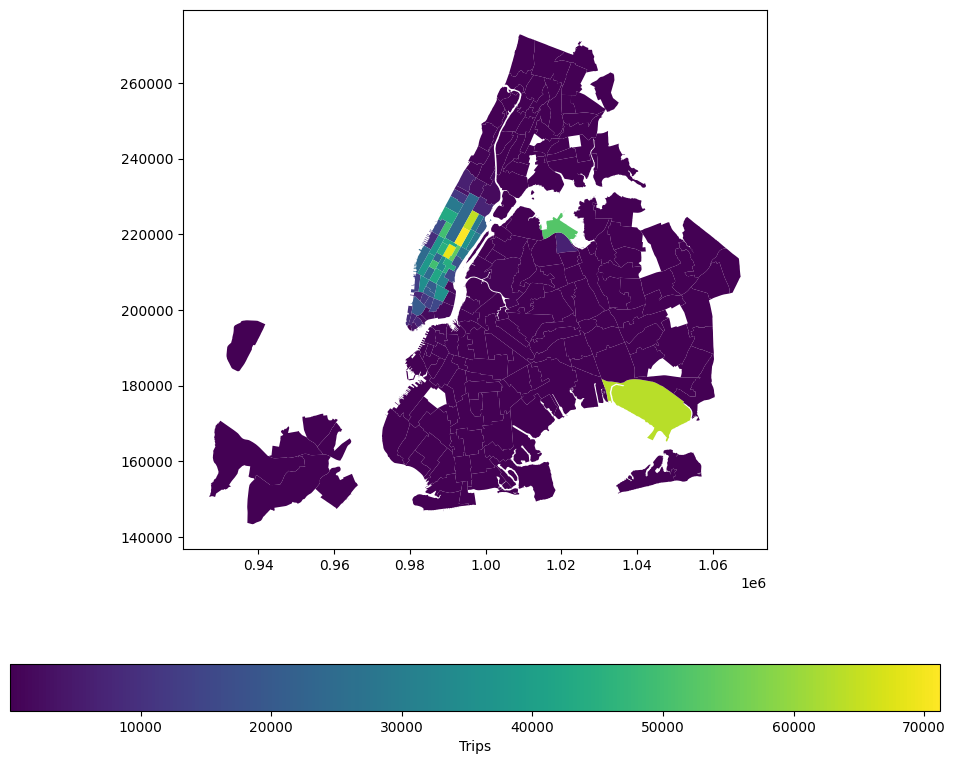

In [94]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column = 'trip_count', ax = ax, legend = True, legend_kwds = {'label': "Trips", 'orientation': "horizontal"})
plt.show();


In [95]:
# can you try displaying the zones DF sorted by the number of trips?

zones.sort_values(by = 'trip_count', ascending = False).head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
131       132    0.245479    0.002038            JFK Airport         132   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  trip_count  
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...     71215.0  
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...     68890.0  
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...     64762.0  
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...     63694.0  
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...     53479.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [96]:
NYC_complete.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        2282         2  2023-01-01 00:19:18   2023-01-01 00:26:11   
1        3269         1  2023-01-01 00:22:41   2023-01-01 00:48:36   
2        2025         1  2023-01-01 00:28:54   2023-01-01 00:32:40   
3        3545         2  2023-01-01 00:53:22   2023-01-01 01:02:18   
4         182         2  2023-01-01 00:50:45   2023-01-01 00:54:44   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              6.0           1.91         1.0                  N   
1              2.0           2.10         1.0                  N   
2              1.0           1.00         1.0                  N   
3              1.0           1.66         1.0                  N   
4              1.0           0.85         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           148           137             1         10.0    1.0      0.5   
1           140           164             1         22.6    2.5      0.5   
2           237           141             1          7.2    3.5      0.5   
3            13           209             1         10.7    1.0      0.5   
4           107            79             1          6.5    1.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        3.00           0.0                    1.0         18.00   
1        6.65           0.0                    1.0         33.25   
2        2.40           0.0                    1.0         14.60   
3        3.14           0.0                    1.0         18.84   
4        3.00           0.0                    1.0         14.50   

   congestion_surcharge tpep_pickup_date  tpep_pickup_hour tpep_dropoff_date  \
0                   2.5       2023-01-01                 0        2023-01-01   
1                   2.5       2023-01-01                 0        2023-01-01   
2                   2.5       2023-01-01                 0        2023-01-01   
3                   2.5       2023-01-01                 0        2023-01-01   
4                   2.5       2023-01-01                 0        2023-01-01   

   tpep_dropoff_hour  Airport_fee  time_taken_in_min  OBJECTID  Shape_Leng  \
0                  0          0.0           6.883333       148    0.039131   
1                  0          0.0          25.916667       140    0.047584   
2                  0          0.0           3.766667       237    0.042213   
3                  1          0.0           8.933333        13    0.050281   
4                  0          0.0           3.983333       107    0.038041   

   Shape_Area                   zone  LocationID    borough  \
0    0.000070        Lower East Side         148  Manhattan   
1    0.000114        Lenox Hill East         140  Manhattan   
2    0.000096  Upper East Side South         237  Manhattan   
3    0.000149      Battery Park City          13  Manhattan   
4    0.000075               Gramercy         107  Manhattan   

                                            geometry  
0  POLYGON ((988552.836 201677.665, 988387.669 20...  
1  POLYGON ((995735.062 215619.835, 995670.105 21...  
2  POLYGON ((993633.442 216961.016, 993507.232 21...  
3  POLYGON ((980801.31 201248.869, 980697.386 200...  
4  POLYGON ((989131.643 205749.904, 989084.531 20...

In [97]:
# Find routes which have the slowest speeds at different times of the day

grouped = NYC_complete.groupby(['PULocationID', 'DOLocationID', 'tpep_pickup_hour']).agg(
    avg_duration=('time_taken_in_min', 'mean'),
    avg_distance=('trip_distance', 'mean')
).reset_index()

In [98]:
grouped['avg_speed_mph'] = grouped['avg_distance'] / (grouped['avg_duration'] / 60)

In [99]:
slowest_routes = grouped.sort_values('avg_speed_mph').head(10)
print(slowest_routes)

        PULocationID  DOLocationID  tpep_pickup_hour  avg_duration  \
75877            209            88                10   1424.116667   
63272            162            65                15     39.483333   
13017             65           181                20   1391.500000   
95435            238           262                 2   1288.700000   
3920              25            25                23    112.666667   
12901             65           129                16     28.633333   
75636            209            13                17    481.983333   
102408           260           260                18    207.650000   
84152            231            40                13   1400.266667   
69063            166            24                 9    288.570000   

        avg_distance  avg_speed_mph  
75877       0.620000       0.026121  
63272       0.030000       0.045589  
13017       2.160000       0.093137  
95435       2.060000       0.095911  
3920        0.190000       0.101183  
1

How does identifying high-traffic, high-demand routes help us?

This could help us to suggest the faster route to the destination.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [100]:
# Visualise the number of trips per hour and find the busiest hour

trips_per_hour = NYC_complete.groupby('tpep_pickup_hour').size().reset_index(name='trip_count')

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [101]:
busiest_hour_row = trips_per_hour.loc[trips_per_hour['trip_count'].idxmax()]
busiest_hour = busiest_hour_row['tpep_pickup_hour']
busiest_hour_trips = busiest_hour_row['trip_count']

print(f"Busiest hour: {busiest_hour} with approximately {int(busiest_hour_trips):,} trips")


Busiest hour: 18 with approximately 104,659 trips


In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x='tpep_pickup_hour', y='trip_count', data=trips_per_hour)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour')
plt.show()

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [103]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
trips_per_hour['scaled_trip_count'] = trips_per_hour['trip_count'] / sample_fraction


Busiest hour: 18.0 with approximately 2,093,180 trips


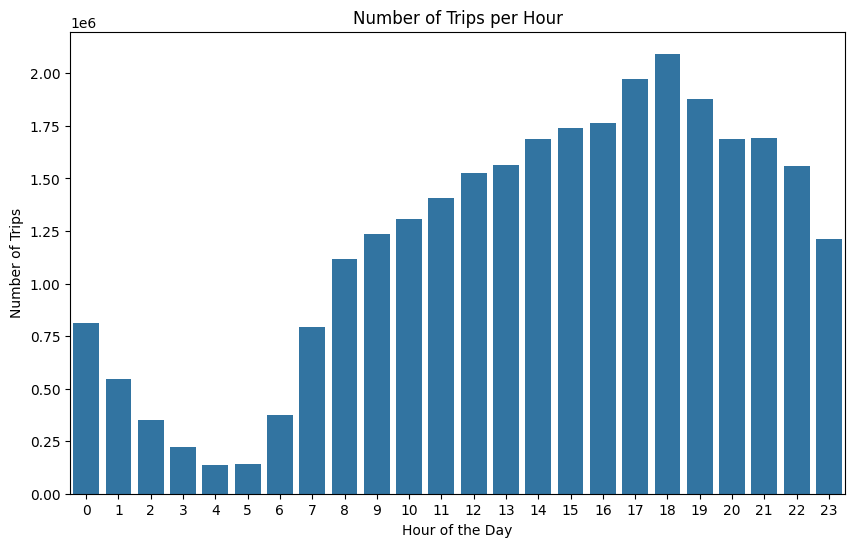

In [104]:
busiest_hour_row = trips_per_hour.loc[trips_per_hour['scaled_trip_count'].idxmax()]
busiest_hour = busiest_hour_row['tpep_pickup_hour']
busiest_hour_trips = busiest_hour_row['scaled_trip_count']

print(f"Busiest hour: {busiest_hour} with approximately {int(busiest_hour_trips):,} trips")

plt.figure(figsize=(10, 6))
sns.barplot(x='tpep_pickup_hour', y='scaled_trip_count', data=trips_per_hour)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour')
plt.show()

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [105]:
# Compare traffic trends for the week days and weekends
NYC_copy_2 = NYC_complete.copy()
# Extract Day of week from the pickup date
NYC_copy_2['day_of_week'] = NYC_copy_2['tpep_pickup_date'].dt.weekday

# Weekdays (0-4), Weekend (5-6)
NYC_copy_2['day_type'] = NYC_copy_2['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [106]:
trips_by_hour = NYC_copy_2.groupby(['day_type', 'tpep_pickup_hour']).size().reset_index(name='trip_count')

# Scale up trip count
trips_by_hour['scaled_trip_count'] = trips_by_hour['trip_count'] / 0.05

In [107]:
# Pivoting for the viusalization
pivot_df = trips_by_hour.pivot(index='tpep_pickup_hour', columns='day_type', values='scaled_trip_count').fillna(0)

plt.figure(figsize=(10, 6))
pivot_df.plot(kind='line', marker='o', figsize=(10, 6))

plt.title('Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Estimated Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show();


<Figure size 1000x600 with 0 Axes>

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

On weekdays we may find the Number of trips higher than that on weekends after 5th hour of the day, but on weekends we may find higher number of trips in 0th to 4th hour of the day than that of weekdays

During weekdays the quiet hours are from 2nd to 4th while on weekends 4th to 6th hour of the day

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [108]:
# Find top 10 pickup and dropoff zones

pickup_counts = NYC_copy_2.groupby(['PULocationID', 'tpep_pickup_hour']).size().reset_index(name='pickup_count')
pickup_counts['pickup_count'] = pickup_counts['pickup_count'] / 0.05  # scale up

# Total pickups per zone to find top 10
top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index
pickup_top10 = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]

pickup_top10.PULocationID.unique()

array([132, 138, 142, 161, 162, 170, 186, 230, 236, 237])

In [109]:
dropoff_counts = NYC_copy_2.groupby(['DOLocationID', 'tpep_dropoff_hour']).size().reset_index(name='dropoff_count')
dropoff_counts['dropoff_count'] = dropoff_counts['dropoff_count'] / 0.05  # scale up

# Total dropoffs per zone to find top 10
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index
dropoff_top10 = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]

dropoff_top10.DOLocationID.unique()

array([ 68, 141, 142, 161, 162, 170, 230, 236, 237, 239])

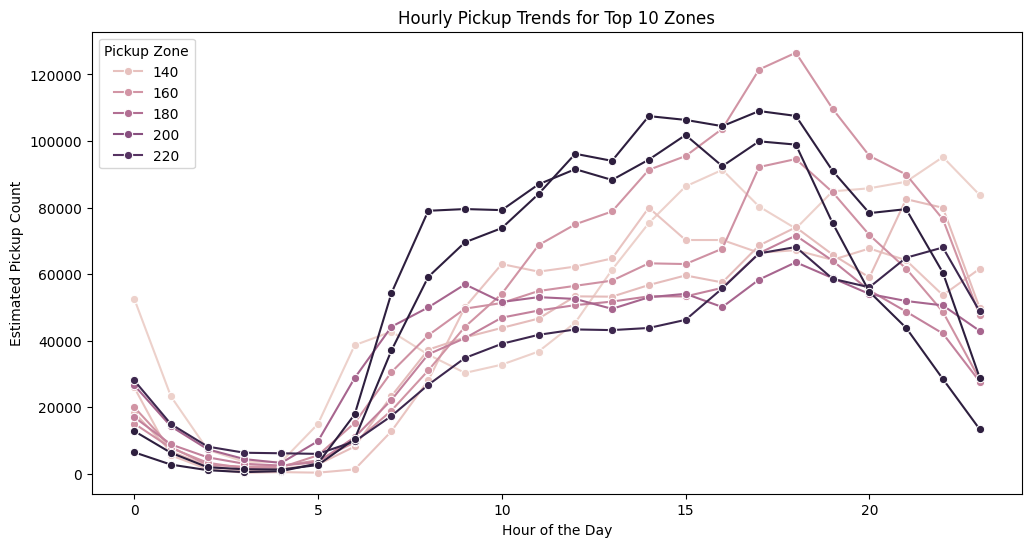

In [110]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=pickup_top10, x='tpep_pickup_hour', y='pickup_count', hue='PULocationID', marker='o')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Estimated Pickup Count')
plt.legend(title='Pickup Zone')
plt.show()

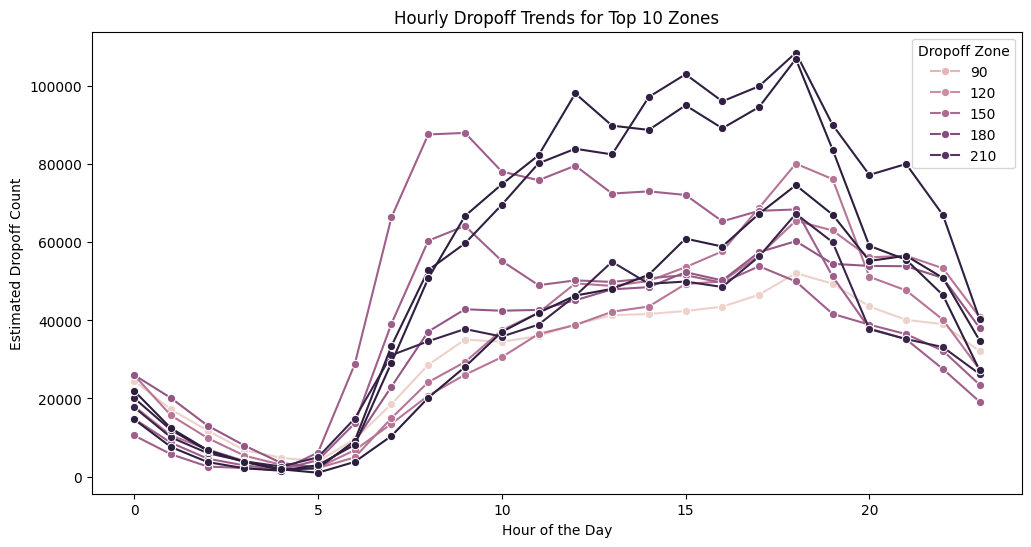

In [111]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dropoff_top10, x='tpep_dropoff_hour', y='dropoff_count', hue='DOLocationID', marker='o')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Estimated Dropoff Count')
plt.legend(title='Dropoff Zone')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [112]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_totals = NYC_copy_2.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_totals = NYC_copy_2.groupby('DOLocationID').size().reset_index(name='dropoff_count')


In [113]:
zone_flow = pd.merge(pickup_totals, dropoff_totals,
                     left_on='PULocationID', right_on='DOLocationID',
                     how='outer')

# Fill NaNs with 0 (for zones that are only pickup or only dropoff)
zone_flow['pickup_count'] = zone_flow['pickup_count'].fillna(0)
zone_flow['dropoff_count'] = zone_flow['dropoff_count'].fillna(0)

# Fix zone ID column
zone_flow['LocationID'] = zone_flow['PULocationID'].combine_first(zone_flow['DOLocationID'])


In [114]:
# To avoid divide-by-zero errors
zone_flow['dropoff_count'] = zone_flow['dropoff_count'].replace(0, 1)

zone_flow['pickup_dropoff_ratio'] = zone_flow['pickup_count'] / zone_flow['dropoff_count']


In [115]:
top10_ratio = zone_flow.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
bottom10_ratio = zone_flow.sort_values('pickup_dropoff_ratio').head(10)

print("🔝 Top 10 Pickup/Dropoff Ratios:")
print(top10_ratio[['LocationID', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\n🔻 Bottom 10 Pickup/Dropoff Ratios:")
print(bottom10_ratio[['LocationID', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


🔝 Top 10 Pickup/Dropoff Ratios:
     LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
68         70.0        6567.0            459             14.307190
126       132.0       63694.0          15282              4.167910
132       138.0       52157.0          19719              2.645012
200       207.0          10.0              6              1.666667
180       186.0       49524.0          30266              1.636292
108       114.0       20626.0          14710              1.402175
41         43.0       24082.0          17584              1.369540
242       249.0       34961.0          26067              1.341198
156       162.0       53479.0          42372              1.262131
155       161.0       68890.0          56204              1.225713

🔻 Bottom 10 Pickup/Dropoff Ratios:
     LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
28         30.0           0.0              8                   0.0
25         27.0           0.0             13                 

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [116]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Night hours: 11 PM (23) to 5 AM (5)
night_df = NYC_copy_2[(NYC_copy_2['tpep_pickup_hour'] >= 23) | (NYC_copy_2['tpep_pickup_hour'] <= 5)]

# Count of pickups and dropoff in Night hours
night_pickups = night_df.groupby('PULocationID').size().reset_index(name='pickup_count')
night_dropoffs = night_df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge the 2 dataframes
night_traffic = pd.merge(night_pickups, night_dropoffs,
                         left_on='PULocationID', right_on='DOLocationID',
                         how='outer')

# Replace NaNs with 0
night_traffic['pickup_count'] = night_traffic['pickup_count'].fillna(0)
night_traffic['dropoff_count'] = night_traffic['dropoff_count'].fillna(0)

# Combine location ID
night_traffic['LocationID'] = night_traffic['PULocationID'].combine_first(night_traffic['DOLocationID'])
night_traffic = night_traffic[['LocationID', 'pickup_count', 'dropoff_count']]


In [117]:
# counting the total traffics and top zones
night_traffic['total_night_traffic'] = night_traffic['pickup_count'] + night_traffic['dropoff_count']

# Top 10 zones with highest total night traffic
top_night_zones = night_traffic.sort_values('total_night_traffic', ascending=False).head(10)

print(top_night_zones)


     LocationID  pickup_count  dropoff_count  total_night_traffic
75         79.0       13182.0           6795              19977.0
237       249.0       10955.0           4172              15127.0
46         48.0        8254.0           5306              13560.0
139       148.0        8327.0           3461              11788.0
123       132.0        9462.0           1363              10825.0
99        107.0        4803.0           4883               9686.0
105       114.0        7413.0           2174               9587.0
64         68.0        4701.0           4733               9434.0
218       230.0        5934.0           3217               9151.0
161       170.0        3389.0           5170               8559.0


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [118]:
# Filter for night hours (11 PM to 5 AM)
def get_time_period(hour):
    return 'Night' if (hour >= 23 or hour <= 5) else 'Day'

NYC_copy_2['time_period'] = NYC_copy_2['tpep_pickup_hour'].apply(get_time_period)



In [119]:
revenue_by_period = NYC_copy_2.groupby('time_period')['total_amount'].sum().reset_index()
total_revenue = revenue_by_period['total_amount'].sum()

# Add revenue share column
revenue_by_period['revenue_share_%'] = (revenue_by_period['total_amount'] / total_revenue) * 100

print(revenue_by_period)


  time_period  total_amount  revenue_share_%
0         Day   37584852.27         87.99051
1       Night    5129813.52         12.00949


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [120]:
# Analyse the fare per mile per passenger for different passenger counts

# Fare per mile
NYC_copy_2['fare_per_mile'] = NYC_copy_2['fare_amount'] / NYC_copy_2['trip_distance']

# Fare per mile per passenger
NYC_copy_2['fare_per_mile_per_passenger'] = NYC_copy_2['fare_per_mile'] / NYC_copy_2['passenger_count']



In [121]:
result = NYC_copy_2.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
result.columns = ['passenger_count', 'avg_fare_per_mile_per_passenger']
print(result)


   passenger_count  avg_fare_per_mile_per_passenger
0              1.0                         9.064546
1              2.0                         5.064933
2              3.0                         3.129822
3              4.0                         4.177630
4              5.0                         1.561023
5              6.0                         1.294994


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [122]:
NYC_copy_2.day_of_week.unique()

array([6, 5, 0, 1, 2, 3, 4], dtype=int32)

In [123]:
# Compare the average fare per mile for different days and for different times of the day

avg_fare_day_hour = NYC_copy_2.groupby(['day_of_week', 'tpep_pickup_hour'])['fare_per_mile'].mean().reset_index()

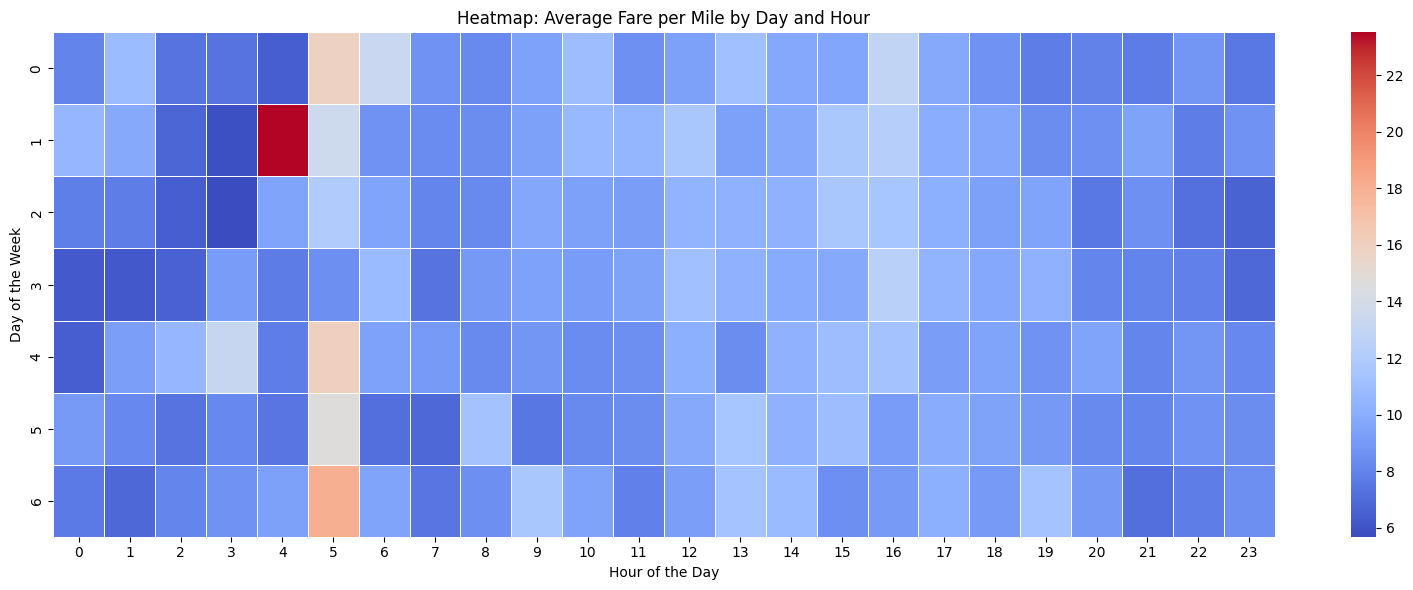

In [124]:
# Pivot to make heatmap-friendly data
pivot_df = avg_fare_day_hour.pivot(index='day_of_week', columns='tpep_pickup_hour', values='fare_per_mile')

plt.figure(figsize=(16, 6))
sns.heatmap(pivot_df, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Heatmap: Average Fare per Mile by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [126]:
# Compare fare per mile for different vendors

NYC_records['tpep_pickup_datetime'] = pd.to_datetime(NYC_records['tpep_pickup_datetime'])

# Filter out invalid records
df_filtered = NYC_records[(NYC_records['fare_amount'] > 0) & (NYC_records['trip_distance'] > 0) & (NYC_records['VendorID'] !=6)]

# Extract hour from pickup time
df_filtered['hour'] = df_filtered['tpep_pickup_datetime'].dt.hour

# Calculate fare per mile
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

vendor_hourly_fare = df_filtered.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()


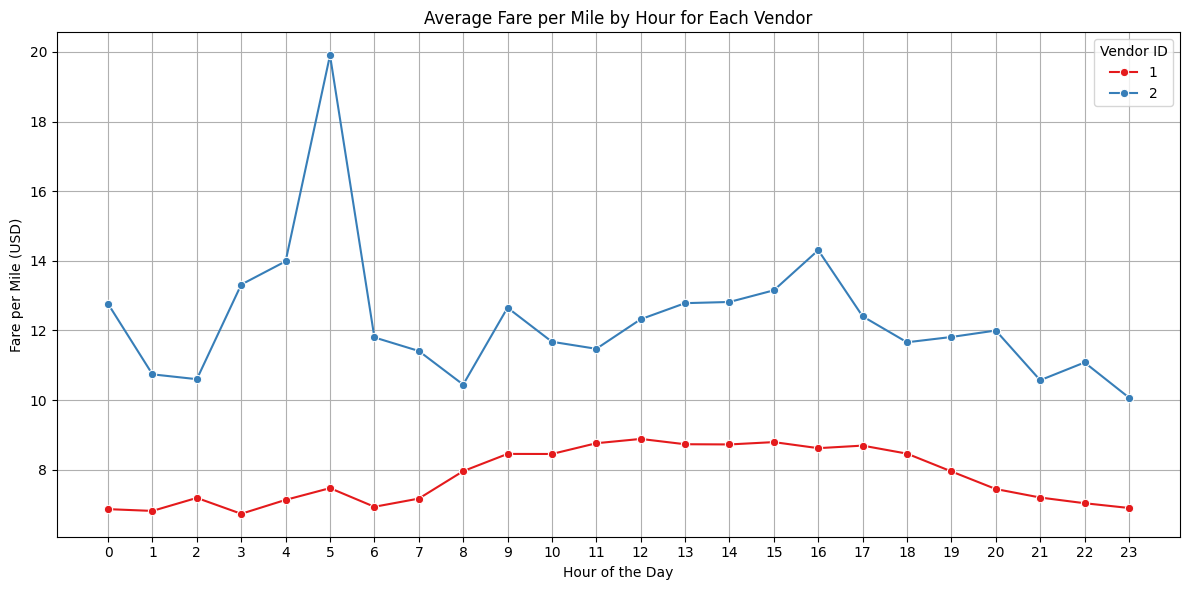

In [127]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_hourly_fare, x='hour', y='fare_per_mile', hue='VendorID', marker='o', palette='Set1')

plt.title('Average Fare per Mile by Hour for Each Vendor')
plt.xlabel('Hour of the Day')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [128]:
# Defining distance tiers

def tier_distance(dist):
    if dist <= 2:
        return '0-2 miles'
    elif dist <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(tier_distance)

# group by distance tier and vendor
tiered_fare = df_filtered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
tiered_fare.columns = ['VendorID', 'Distance_Tier', 'Avg_Fare_per_Mile']


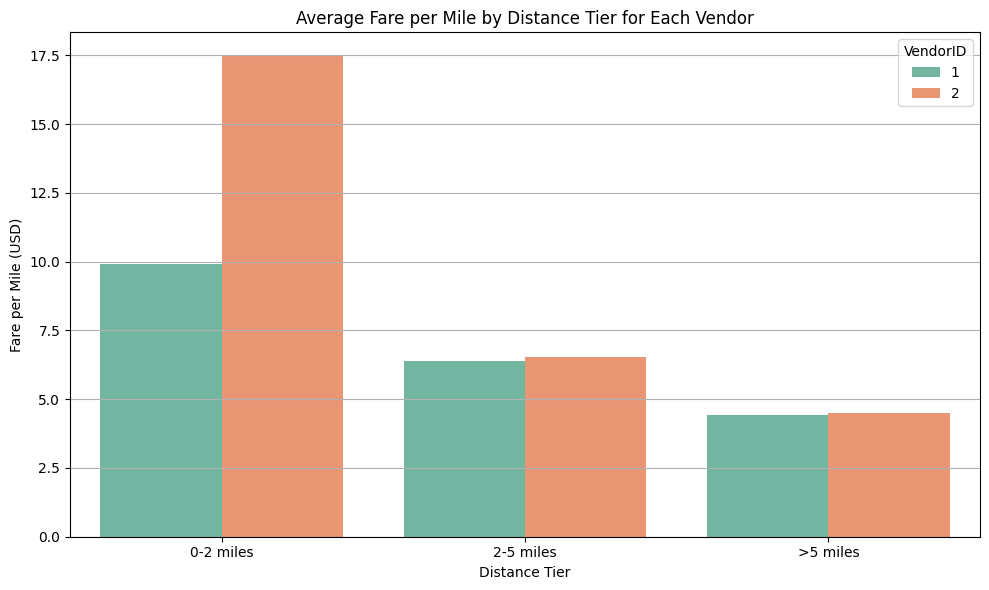

In [129]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_fare, x='Distance_Tier', y='Avg_Fare_per_Mile', hue='VendorID', palette='Set2')

plt.title('Average Fare per Mile by Distance Tier for Each Vendor')
plt.ylabel('Fare per Mile (USD)')
plt.xlabel('Distance Tier')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.